<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/signal_acqusition_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train_data shape is (200000, 400, 1)
train_labels shape is (200000, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 5, 1)              71        
_________________________________________________________________
flatten_14 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 12        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0204 - accuracy: 0.9927
Epoch 2/2
6250/6250 [==============================] - 11s 2ms/step - loss: 1.8704e-05 - accuracy: 1.0000
(70, 1, 1)


Text(0.5, 1.0, 'First layer kernel')

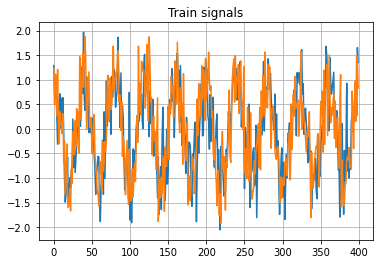

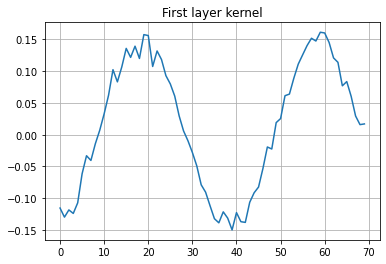

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


signalLength  = 400 
N             = 100000
jitter        = 0
numKernels    = 1


tx1           = np.random.randn(N,signalLength)*0.5
tx2           = np.random.randn(N,signalLength)*0.5

for k in range(N):
  sk = np.array(np.cos( 2*np.pi/signalLength*10*(np.arange(0.,signalLength)+ jitter*np.random.randn(1)) ))
  tx2[k,:] = tx2[k,:] + sk

train_data   = np.vstack((tx1,tx2))
train_labels = np.vstack((np.zeros((N,1)),np.ones((N,1))))
#train_labels = keras.utils.to_categorical( np.vstack((np.zeros((N,1)),np.ones((N,1)))) )

train_data  = np.reshape(train_data,(2*N,signalLength,1))
print( 'train_data shape is {}'.format(train_data.shape) )

print( 'train_labels shape is {}'.format(train_labels.shape) )

model = keras.Sequential()
model.add( keras.layers.Conv1D(filters=numKernels, kernel_size=70,padding='valid',input_shape=(signalLength,1),strides=70) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(2, activation='softmax') )

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

model.fit(x=train_data, y=train_labels,shuffle=True, epochs=2)

plt.figure()
plt.plot(tx2[0,:])
plt.plot(tx2[10,:])
plt.grid(True)
plt.title('Train signals')

h = np.array(model.layers[0].get_weights()[0])
#h = np.array(model.layers[0].output.numpy())
print(h.shape)
plt.figure()
for k in range(numKernels):
  plt.plot(h[:,0,k])
plt.grid(True)
plt.title('First layer kernel')


(50, 1, 1)


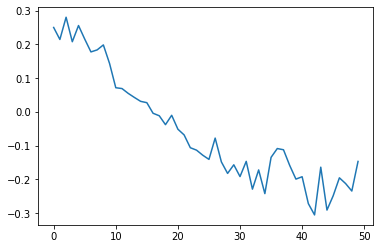

In [12]:

h = np.array(model.layers[0].get_weights()[0])
#h = np.array(model.layers[0].output.numpy())
print(h.shape)

plt.plot(h[:,0,0])

#plt.plot(model.layers[2].kernel[:,0])
#plt.plot(model.layers[2].kernel[:,1])
